In [1]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_delfines=ldata("data/dolphins.gml")
genero=ldata("data/dolphinsGender.txt")

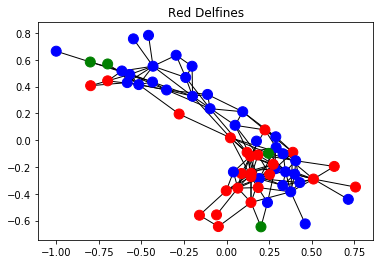

In [3]:
G=nx.read_gml("data/dolphins.gml")

f=[]                     ##f es la lista de nodos tal cual los ordena el nx. Es una especie de orden alfabético
for n in nx.nodes(G):
    f.append(n)

F=[]                    ##F va a ser el nuevo vector de generos pero ordenando los nodos de la misma manera que lo hace nx
for n in f:
   for k,g in genero:
        if k==n:
            F.append([k,g])
# a=0                        ##Todo esto cuenta cuántos nodos de f coinciden con los nodos de F. Es decir, se fija si están en el mismo orden las dos listas de nodos
# k=0
# for n in f:
#    k+=1
#    if n==F[k-1][0]:
#         a+=1
# a
SG=dict(F)                               ##Quizás sea importante: Le di atributos a los nodos. Quizás es una mejor manera de pintar el grafo. Creo que sirve para calcular el grado
nx.set_node_attributes(G, SG,"genero")
# nx.get_node_attributes(G,"genero")
options={'with_labels':False,
        'node_color':["r" if g=="f" else "b" if g=="m" else "g" for n,g in F],
        'font_weight':'bold',
        'node_size':100}
plt.title("Red Delfines")

nx.draw_networkx(G,**options)
plt.show()

In [4]:
f=0                 ##cuenta cuántos masculinos y femeninos hay. Los no identificados los pone como masculinos
m=0
NA=0
for n,g in genero:
   if g=="f":
    f+=1
   else:
    if g=="m":
        m+=1
    else:
        NA+=1
print(f,m,NA)    

24 34 4


In [5]:
Enlaces_P=[]                     
GENERO=nx.get_node_attributes(G,"genero")
for n in G.edges:
    Enlaces_P.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
EnlacesMM_P=[]
for n,m,o,p in Enlaces_P:
    if m=="m" and p=="m":
        EnlacesMM_P.append([n,o])
EnlacesFF_P=[]
for n,m,o,p in Enlaces_P:
    if m=="f" and p=="f":
        EnlacesFF_P.append([n,o])
EnlacesNAM_P=[]
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="m":
            EnlacesNAM_P.append([n,o])        
    if  m=="m" and p=="NA":
            EnlacesNAM_P.append([n,o])
EnlacesNAF_P=[]
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="f":
        EnlacesNAF_P.append([n,o]) 
    if m=="f" and p=="NA":
        EnlacesNAF_P.append([n,o])
EnlacesNANA_P=[]
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="NA":
        EnlacesNANA_P.append([n,o])  
        
Probabilidad_de_enlaces_P=(len(EnlacesMM_P)/len(Enlaces_P),
                           len(EnlacesFF_P)/len(Enlaces_P),
                           len(EnlacesNAM_P)/len(Enlaces_P),
                           len(EnlacesNAF_P)/len(Enlaces_P),
                           len(EnlacesNANA_P)/len(Enlaces_P),
                           (len(Enlaces_P)-len(EnlacesFF_P)-len(EnlacesMM_P)-len(EnlacesNAM_P)-len(EnlacesNAF_P)-len(EnlacesNANA_P))/len(Enlaces_P))
print(Probabilidad_de_enlaces_P)
sum(Probabilidad_de_enlaces_P)

(0.37735849056603776, 0.22641509433962265, 0.0440251572327044, 0.025157232704402517, 0.0, 0.3270440251572327)


1.0

In [6]:
def Genero_al_azar(Gen):
#    k=0
#    p=np.random.uniform(low=0,high=1,size=len(Gen))
#    F_Gen=[]
#    for n,g in Gen:
#        k+=1
#        if p[k-1]<0.5:
#            F_Gen.append([n,"f"])
#        else:
#            F_Gen.append([n,"m"]) ##Esto genera géneros aleatorios para cada uno de los nodos. Utiliza como lista de partida la que ya está bien ordenada
    
    N=[]
    J=[]
    for n,g in Gen:
        N.append(n)
        J.append(g)
    np.random.shuffle(J)
    
    F_Gen=[]
    for n in range(len(N)):
        F_Gen.append([N[n],J[n]])
    SG_0=dict(F_Gen)                               ##Quizás sea importante: Le di atributos a los nodos. Quizás es una mejor manera de pintar el grafo. Creo que sirve para calcular el grado
    nx.set_node_attributes(G, SG_0,"genero")
    
    Enlaces=[]                     
    GENERO=nx.get_node_attributes(G,"genero")
    for n in G.edges:
        Enlaces.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
    EnlacesMM=[]
    for n,m,o,p in Enlaces:
        if m=="m" and p=="m":
            EnlacesMM.append([n,o])
    EnlacesFF=[]
    for n,m,o,p in Enlaces:
        if m=="f" and p=="f":
            EnlacesFF.append([n,o])
    EnlacesNAM=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="m":
            EnlacesNAM.append([n,o]) 
        if  m=="m" and p=="NA":
            EnlacesNAM.append([n,o])

    EnlacesNAF=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="f":
            EnlacesNAF.append([n,o]) 
        if m=="f" and p=="NA":
            EnlacesNAF.append([n,o])
    EnlacesNANA=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="NA":
            EnlacesNANA.append([n,o])  

    Probabilidad_de_enlaces=(len(EnlacesMM)/len(Enlaces),
                             len(EnlacesFF)/len(Enlaces),
                             len(EnlacesNAM)/len(Enlaces),
                             len(EnlacesNAF)/len(Enlaces),
                             len(EnlacesNANA)/len(Enlaces),
                             (len(Enlaces)-len(EnlacesFF)-len(EnlacesMM)-len(EnlacesNAM)-len(EnlacesNAF)-len(EnlacesNANA))/len(Enlaces))

    return(Probabilidad_de_enlaces) ##Genera una lista de tres elementos con la probabilidad de sacar un enlace MM,FF,MF para cada distribución de géneros aleatoria

In [63]:
Dis_prob_enlaMM=[] ##Vector que va a alojar las prob MM de cada distribución aleatoria de género
Dis_prob_enlaFF=[] ##Vector que va a alojar las prob FF de cada distribución aleatoria de género
Dis_prob_enlaMF=[] ##Vector que va a alojar las prob MF de cada distribución aleatoria de género
Q=100000
for q in range(0,Q): ##Corro q veces la función Genero_al_azar para armar la distribución de probabilidades
    Dis_prob_enlaMM.append(Genero_al_azar(F)[0])
    Dis_prob_enlaFF.append(Genero_al_azar(F)[1])
    Dis_prob_enlaMF.append(Genero_al_azar(F)[5])

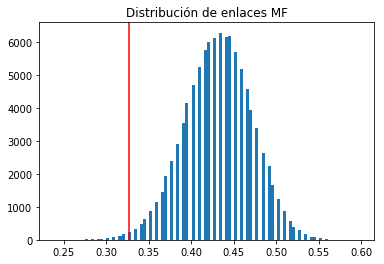

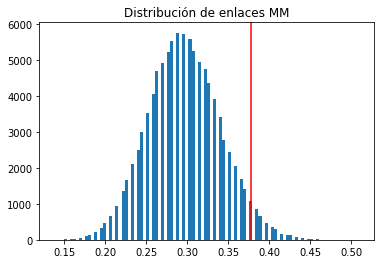

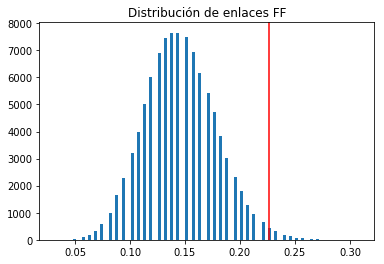

In [67]:
bineo=100
plt.hist(Dis_prob_enlaMF,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[5],c="red")
plt.title("Distribución de enlaces MF")
plt.show()

plt.hist(Dis_prob_enlaMM,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[0],c="red")
plt.title("Distribución de enlaces MM")
plt.show()

plt.hist(Dis_prob_enlaFF, bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[1],c="red")
plt.title("Distribución de enlaces FF")
plt.show()

In [10]:
# Dis_prob_enlaMMFF=[]
# for j in range(len(Dis_prob_enlaMM)):
#     Dis_prob_enlaMMFF.append(Dis_prob_enlaMM[j]+Dis_prob_enlaFF[j])
    
# p=len(EnlacesMM_P)/len(Enlaces_P)+len(EnlacesFF_P)/len(Enlaces_P)
                           

In [68]:
##Veamos cuántos eventos son más extremos que los obtenidos para nuestra red en particular

histMF=np.histogram(Dis_prob_enlaMF,bins=bineo)
histMM=np.histogram(Dis_prob_enlaMM,bins=bineo)
histFF=np.histogram(Dis_prob_enlaFF,bins=bineo)
pMF=Probabilidad_de_enlaces_P[5]
pMM=Probabilidad_de_enlaces_P[0]
pFF=Probabilidad_de_enlaces_P[1]
NMF=[]
NMM=[]
NFF=[]
for i in range(len(histMF[0])):
    if histMF[1][i]<pMF:
        NMF.append(histMF[0][i])
for i in range(len(histMM[0])):
    if histMM[1][i]>pMM:
        NMM.append(histMM[0][i])
for i in range(len(histFF[0])):
    if histFF[1][i]>pFF:
        NFF.append(histFF[0][i])
Que_tan_anomala_es_la_red=[sum(NMF)/Q,sum(NMM)/Q,sum(NFF)/Q]  
print(Que_tan_anomala_es_la_red)    

[0.00732, 0.03255, 0.00856]


1